In [1]:
import pandas as pd
import numpy as np
import re

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("dataset/dataset.csv", delimiter=";", encoding= 'unicode_escape')

In [3]:
#agar semua dokumen dapat ditampilkan
pd.set_option("display.max_colwidth", 0)

In [4]:
# Memastikan jumlah row dataset
df.count()

berita     600
tagging    600
dtype: int64

In [5]:
# Melakukan pengecekan jumlah missing data
df.isnull().sum()

berita     0
tagging    0
dtype: int64

In [6]:
# Melakukan pengecekan perbandingan rasio label
np.unique(df['tagging'], return_counts=True)

(array(['Hoax', 'Valid'], dtype=object), array([228, 372], dtype=int64))

In [7]:
stop_words_list = pd.read_csv("dataset/stopwordbahasa.csv")
stop_words_list = stop_words_list.to_numpy()

# Menghilangkan karakter hasil scrapping yang kurang baik (unnecessary character)


text = df["berita"].to_numpy()

for index in range(len(text)):
    text[index] = re.sub(r"[^A-Za-z0-9\s]+", "", text[index])
    text[index] = re.sub("\n"," ", text[index])
    text[index] = [word.lower() for word in text[index].split() if word.lower() not in stop_words_list]

In [8]:
df.head(3)

,berita,tagging
0,"[jakarta, jejaring, sosial, beredar, informasi, menyebut, lele, ikan, jorok, sesuap, daging, ikan, lele, terkandung, 3000, sel, kanker, julukan, ikan, jorok, merujuk, sifat, lele, doyan, mengonsumsi, jenis, limbah, perairan, artikel, viral, internet, kotoran, manusia, dijadikan, pakan, budidaya, lele, kota, haikou, china, habitat, aslinya, lele, catfish, dikenal, spesies, ikan, tangguh, ikan, dilengkapi, alat, pernapasan, tambahan, labirin, bertahan, hidup, kondisi, perairan, berlumpur, tercemar, fakta, memunculkan, dugaan, akumulasi, racun, karsinogen, penyebab, kanker, tubuh, ikan, lele, untungnya, ikan, lele, beredar, pasaran, berasal, alam, liar, lele, dibudidayakan, kolamkolam, mestinya, dikendalikan, bebas, pencemaran, pakan, dipilih, mengandalkan, limbah, popularitas, ikan, bersungut, pudar, meningkat, data, kementerian, kelautan, perikanan, kkp, ...]",Valid
1,"[isu, ikan, lele, mengandung, sel, kanker, jejaring, social, berita, mulut, mulut, menyebar, dampak, isu, enggan, membeli, ikan, lele, waspada, online, berhasil, merangkum, komentar, ibuibu, membeli, ikan, lele, konsumsi, rutin, lauk, beredarnya, informasi, lele, mengandung, kanker, dipisu, kehidupan, ikan, lele, hidup, jorok, julukan, ikan, jorok, merujuk, sifat, lele, doyan, mengonsumsi, jenis, limbah, perairan, artikel, vital, internet, kotoran, manusia, dijadikan, pakan, budidaya, lele, kota, haikou, tiongkok, berdasar, isu, sesuap, daging, ikan, lele, terkandung, 3000, sel, kanker, isu, cepat, berkembang, media, sosial, mulut, mulut, isu, menyurutkan, penjualan, ikan, lele, medan, stabil, berpengaruh, pengakuan, pedagang, medan, petani, ikan, lele, medan, ada, pengaruh, isu, konsumsi, ...]",Valid
2,"[penikmat, kuliner, bahan, dasar, ikan, lele, berita, sungguh, menyedihkan, ikan, enak, dianggap, sumber, penyakit, informasi, peroleh, masyarakat, ikan, lele, mengandung, 3000, sel, kanker, ikan, lele, kemampuan, hidup, dilengkapi, alat, pernafasan, tambahan, labirin, kemampuan, hidup, melebihi, ikan, ikan, ikan, lele, hidupnya, kotor, berlumpur, jorok, ikan, lele, memakan, limbah, kotoran, opini, masyarakat, lele, menyebabkan, penyakit, kanker, budidaya, lele, kotor, jorok, budi, daya, lele, kolam, bersih, kolam, sintetis, air, bersih, pasokan, makanan, lele, terjamin, masaknya, mengolahnya, ikan, lele, nikmat, digoreng, kebanyakan, orang, si, penjual, lele, minyak, jelantah, menggoreng, ikan, lele, minyak, goreng, berulangulang, minyak, goreng, berulang, ulang, warnanya, hitam, pekat, menyebabkan, penyakit, kanker, ...]",Valid


In [9]:
# Mengubah label valid menjadi 1, dan label hoax menjadi 0
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["tagging"] = encoder.fit_transform(df["tagging"])

In [10]:
from sklearn.model_selection import train_test_split
X = df["berita"]
y = df["tagging"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [11]:
X_train[0]

['jakarta',
 'jejaring',
 'sosial',
 'beredar',
 'informasi',
 'menyebut',
 'lele',
 'ikan',
 'jorok',
 'sesuap',
 'daging',
 'ikan',
 'lele',
 'terkandung',
 '3000',
 'sel',
 'kanker',
 'julukan',
 'ikan',
 'jorok',
 'merujuk',
 'sifat',
 'lele',
 'doyan',
 'mengonsumsi',
 'jenis',
 'limbah',
 'perairan',
 'artikel',
 'viral',
 'internet',
 'kotoran',
 'manusia',
 'dijadikan',
 'pakan',
 'budidaya',
 'lele',
 'kota',
 'haikou',
 'china',
 'habitat',
 'aslinya',
 'lele',
 'catfish',
 'dikenal',
 'spesies',
 'ikan',
 'tangguh',
 'ikan',
 'dilengkapi',
 'alat',
 'pernapasan',
 'tambahan',
 'labirin',
 'bertahan',
 'hidup',
 'kondisi',
 'perairan',
 'berlumpur',
 'tercemar',
 'fakta',
 'memunculkan',
 'dugaan',
 'akumulasi',
 'racun',
 'karsinogen',
 'penyebab',
 'kanker',
 'tubuh',
 'ikan',
 'lele',
 'untungnya',
 'ikan',
 'lele',
 'beredar',
 'pasaran',
 'berasal',
 'alam',
 'liar',
 'lele',
 'dibudidayakan',
 'kolamkolam',
 'mestinya',
 'dikendalikan',
 'bebas',
 'pencemaran',
 'pakan'

In [12]:
vocab_size = 9600
embedding_dim = 32
max_length = 150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [13]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

total_words = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(X_train)
testing_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type)
X_test_padded = pad_sequences(testing_sequences,maxlen=max_length, padding=padding_type)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        ACCURACY_THRESHOLD = 0.98
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):   
            print("\nTarget reached %2.2f%%. Stop Training" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

cb = Callbacks()
    
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt ,metrics=['accuracy'])

fitting_history = model.fit(
                        X_train_padded,
                        y_train,
                        epochs=150,
                        validation_data=(X_test_padded, y_test),
                        callbacks = [cb],
                  )

Epoch 1/150
18/18 [==============================] - 1s 13ms/step - loss: 0.6927 - accuracy: 0.5842 - val_loss: 0.6910 - val_accuracy: 0.7333
Epoch 2/150
18/18 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.6140 - val_loss: 0.6877 - val_accuracy: 0.7333
Epoch 3/150
18/18 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.6140 - val_loss: 0.6841 - val_accuracy: 0.7333
Epoch 4/150
18/18 [==============================] - 0s 5ms/step - loss: 0.6875 - accuracy: 0.6140 - val_loss: 0.6802 - val_accuracy: 0.7333
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.6140 - val_loss: 0.6759 - val_accuracy: 0.7333
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.6140 - val_loss: 0.6712 - val_accuracy: 0.7333
Epoch 7/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6808 - accuracy: 0.6140 - val_loss: 0.6670 - val_accuracy: 0.7333
Epoch 8/150


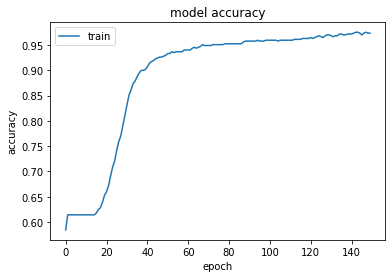

In [15]:
plt.plot(fitting_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

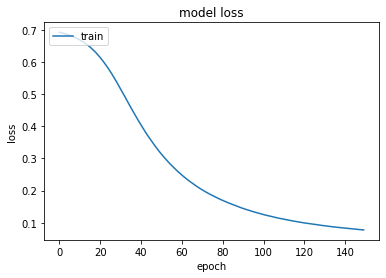

In [16]:
plt.plot(fitting_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.save("best_model.h5")

In [18]:
import pickle
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)